# Test Aperture Photometry

Tests that WrappedFits is able to load a local directory of calints files, and that PhotometryData is then able to extract the raw flux from it.

In [1]:
from erebus.photometry_data import PhotometryData
from erebus.wrapped_fits import WrappedFits
from erebus.utility import fits_file_utils as f_utils
import matplotlib.pyplot as plt

In [2]:
folder = "./mast_lhs1478b"
visits = f_utils.get_fits_files_visits_in_folder(folder)

## Load directly from calints via util method

In [3]:
frames, time = f_utils.load_all_calints_for_visit(folder, visits[0])

Loading data from calints in ./mast_lhs1478b
Loading 5 segments


100%|█████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:10<00:00,  2.00s/it]


Sorting data


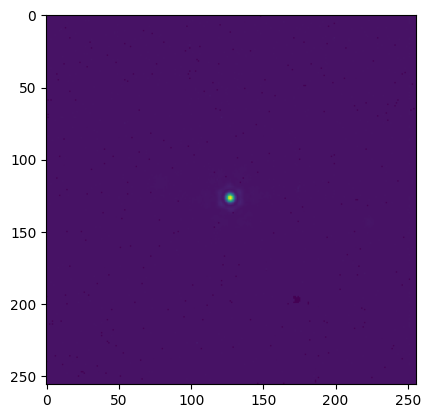

In [4]:
plt.imshow(frames[0])
plt.show()

## Load using wrapped fits and extract photometry

In [5]:
fits = WrappedFits(folder, visits[0], force_clear_cache=True)
photometry = PhotometryData(fits, 5, (12,20), force_clear_cache=True)

Loading data from calints in ./mast_lhs1478b
Loading 5 segments


100%|█████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:08<00:00,  1.62s/it]


Sorting data
Found star at: 127, 127
Rejecting NaNs and outliers


100%|█████████████████████████████████████████████████████████████████████████████████| 127/127 [00:01<00:00, 75.57it/s]


Interpolating bad pixels


100%|█████████████████████████████████████████████████████████████████████████████████| 964/964 [03:42<00:00,  4.34it/s]


50 pixels were bad out of 16129
351 values were interpolated out of 15548356
1656 values were outliers out of 15548356


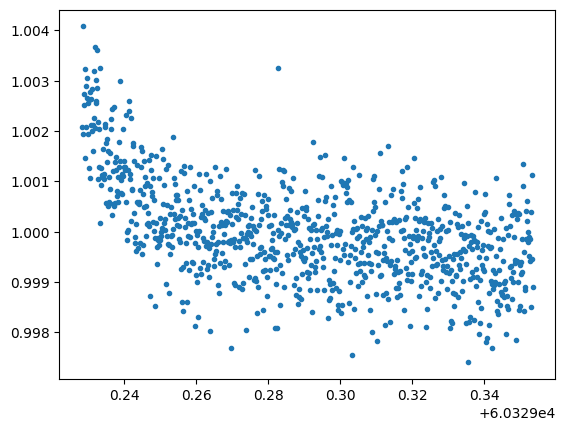

In [6]:
plt.plot(photometry.time[20:-40], photometry.raw_flux[20:-40], linestyle='', marker='.')
plt.show()

## Load from cache

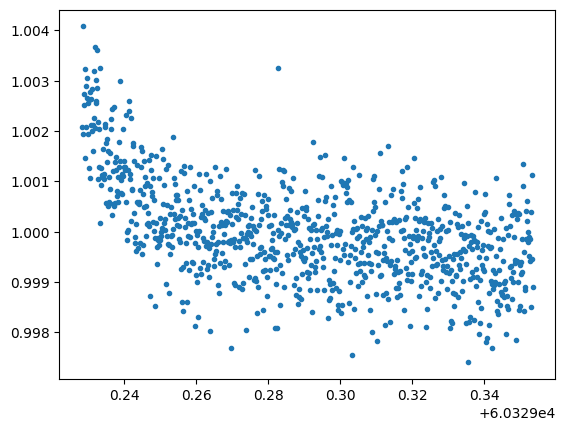

In [7]:
fits = WrappedFits(folder, visits[0], force_clear_cache=False)
photometry = PhotometryData(fits, 5, (12,20), force_clear_cache=False)
plt.plot(photometry.time[20:-40], photometry.raw_flux[20:-40], linestyle='', marker='.')
plt.show()